In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shifatearman/bananalsd")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [98]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shifatearman/bananalsd")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/


In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras.applications import ResNet50, DenseNet121, EfficientNetV2L
from sklearn.metrics import classification_report, confusion_matrix
sns.set()

In [100]:
os.listdir('/kaggle/input/')

['BananaLSD']

In [101]:
os.listdir('/kaggle/input/BananaLSD')

['AugmentedSet', 'OriginalSet']

In [102]:
os.listdir('/kaggle/input/BananaLSD/AugmentedSet')

['cordana', 'sigatoka', 'pestalotiopsis', 'healthy']

In [103]:
images, labels = [], []
for i in os.listdir('/kaggle/input/BananaLSD/AugmentedSet'):
  for j in os.listdir(os.path.join('/kaggle/input/BananaLSD/AugmentedSet', i)):
    path = os.path.join('/kaggle/input/BananaLSD/AugmentedSet', i, j)
    img = cv2.imread(path)
    if img is None:
      print(path)
    else:
      resized_img = cv2.resize(img, (80, 80))
      images.append(resized_img)
      labels.append(i)

In [104]:
df_labels = pd.DataFrame({
    'label' : labels
})

In [105]:
print('The size of dataset is:', len(images))
print('The number of labels in the dataset is:', df_labels['label'].nunique())
print('The labels in the dataset are:', df_labels['label'].unique())

The size of dataset is: 1600
The number of labels in the dataset is: 4
The labels in the dataset are: ['cordana' 'sigatoka' 'pestalotiopsis' 'healthy']


In [106]:
X, y = shuffle(images, labels, random_state = 101)

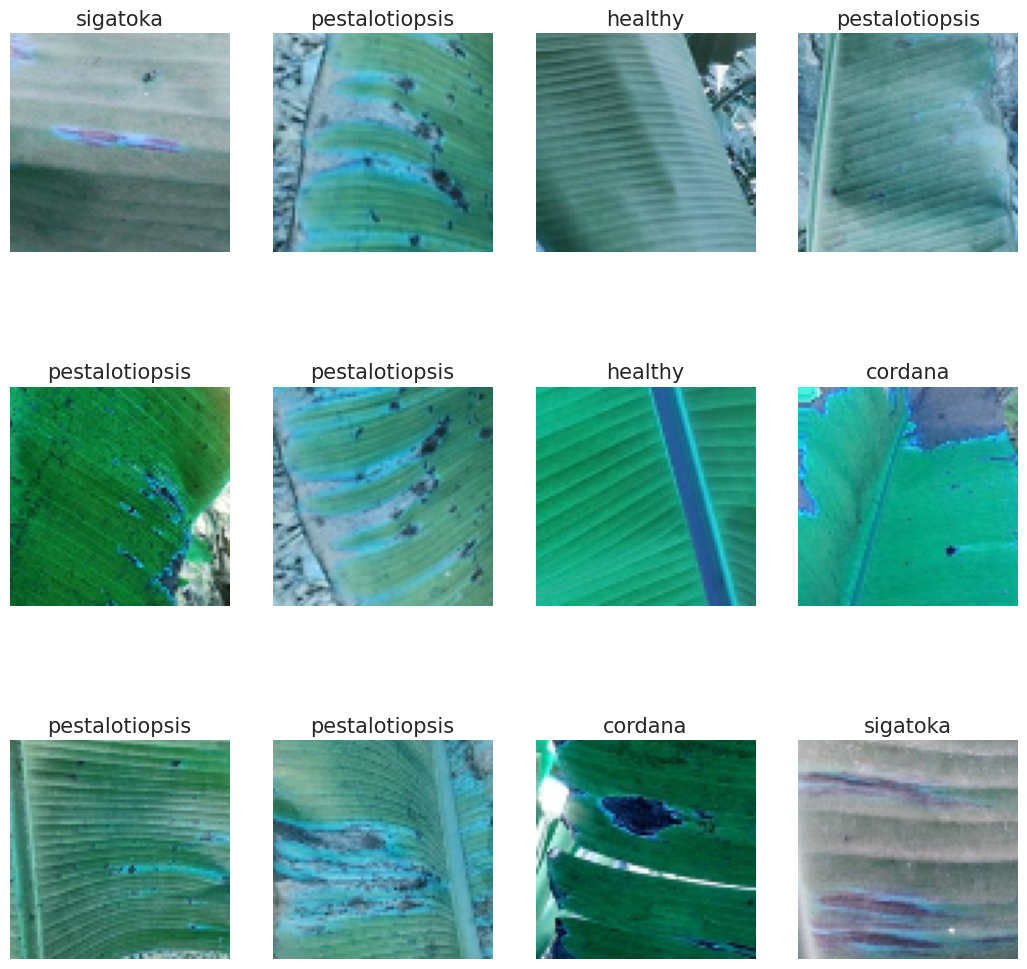

In [107]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [108]:
def image_segmentation(img):
  img_reshaped = img.reshape((-1, 3))
  img_float = np.float32(img_reshaped)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(img_float, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_data = segmented_data.reshape((img.shape))
  return segmented_data

In [109]:
X_np = np.array(X)

In [110]:
X_seg = image_segmentation(X_np)

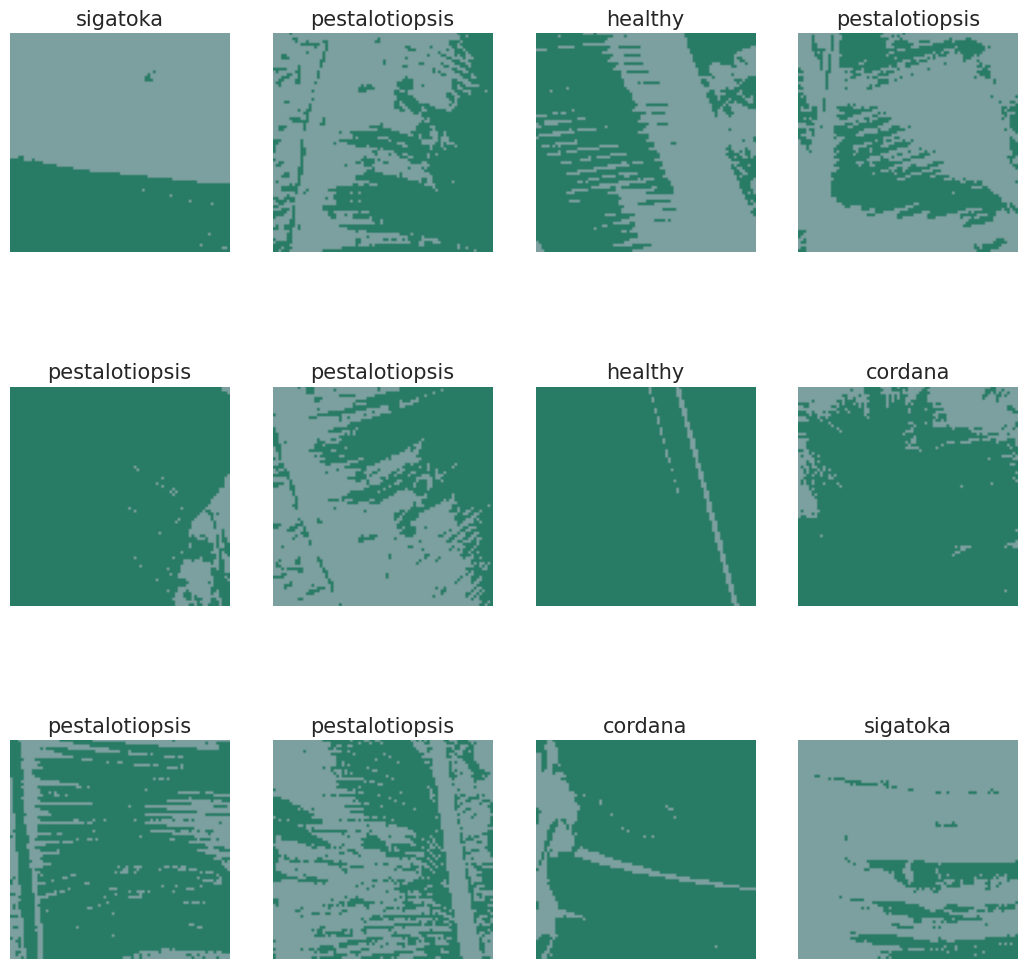

In [111]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X_seg[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [112]:
def image_segmentation2(img):
  img_reshaped = img.reshape((-1, 3))
  img_float = np.float32(img_reshaped)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(img_float, 3, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_data = segmented_data.reshape(img.shape)
  return segmented_data

In [113]:
X_seg2 = image_segmentation2(X_np)

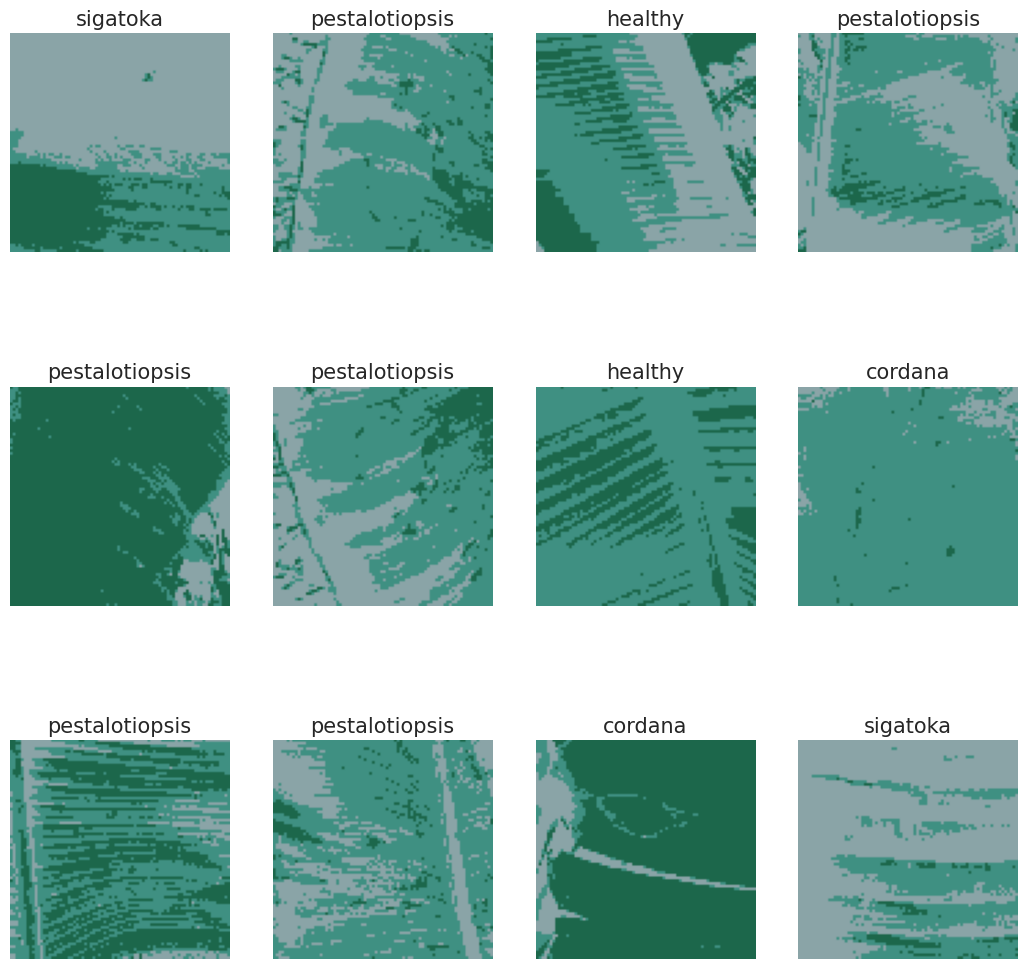

In [114]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X_seg2[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [115]:
def img_segmentation3(img):
  img_reshaped = img.reshape((-1, 3))
  img_float = np.float32(img_reshaped)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
  retval, labels, centers = cv2.kmeans(img_float, 4, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  centers = np.uint8(centers)
  segmented_data = centers[labels.flatten()]
  segmented_data = segmented_data.reshape(img.shape)
  return segmented_data

In [116]:
X_seg3 = img_segmentation3(X_np)

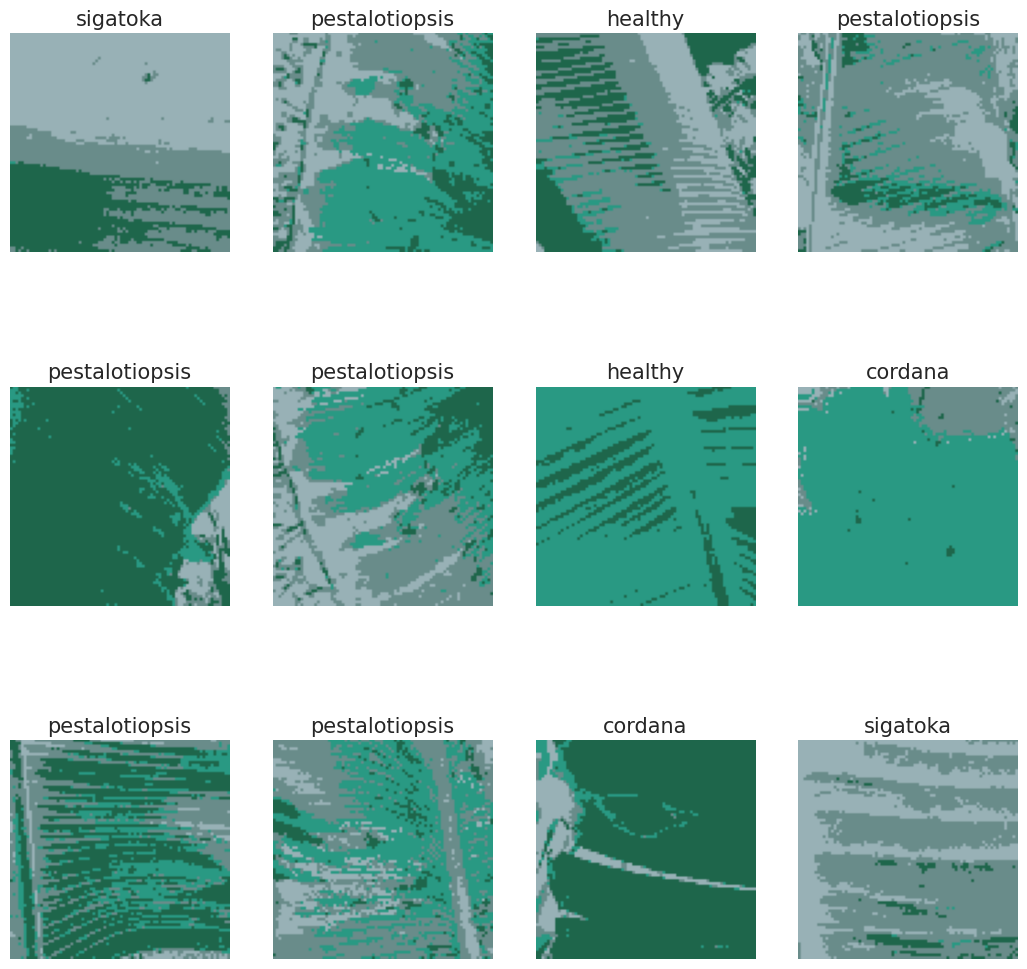

In [117]:
plt.figure(figsize = (13, 13))
for i in range(12):
  ax = plt.subplot(3, 4, i + 1)
  plt.imshow(X_seg3[i])
  plt.title(y[i], fontsize = 15)
  plt.axis('off')

In [118]:
le = LabelEncoder()

In [119]:
y_le = le.fit_transform(y)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_seg3, y_le, test_size = 0.2, random_state = 101, shuffle = True, stratify = y_le)

In [121]:
print('The size of training set is:', len(X_train))
print('The size of test set is:', len(X_test))

The size of training set is: 1280
The size of test set is: 320


In [122]:
X_train_np = np.array(X_train)

In [123]:
X_test_np = np.array(X_test)

In [124]:
X_train_scaled = X_train_np / 255

In [125]:
X_test_scaled = X_test_np / 255

In [126]:
model = Sequential()

In [127]:
model.add(Input(shape = (80, 80, 3)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(16, (3, 3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

In [128]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [129]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 2)

In [130]:
history = model.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.2107 - loss: 101.9987 - val_accuracy: 0.2969 - val_loss: 1.3857
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2224 - loss: 1.3868 - val_accuracy: 0.2969 - val_loss: 1.3858
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2371 - loss: 1.3866 - val_accuracy: 0.2969 - val_loss: 1.3858


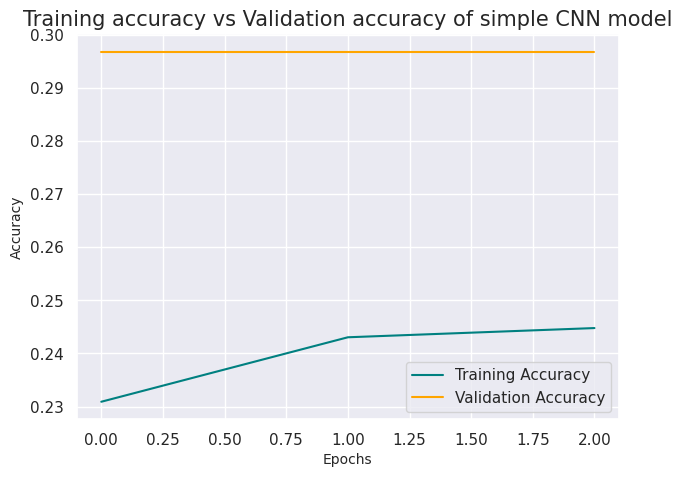

In [131]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of simple CNN model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

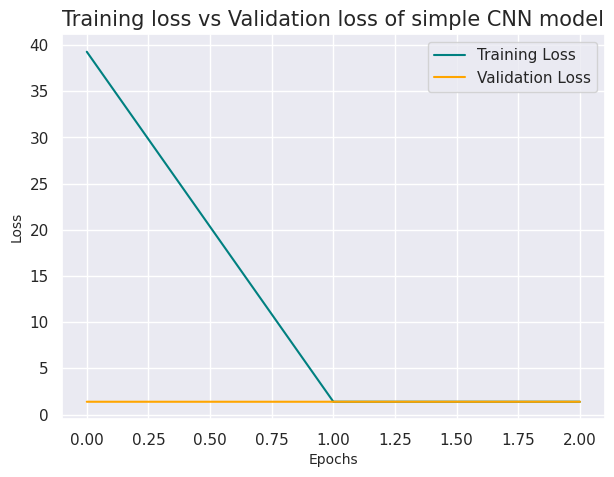

In [132]:
plt.figure(figsize = (7, 5))
plt.plot(history.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of simple CNN model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [133]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [134]:
model2 = Sequential()

In [135]:
model2.add(base_model)
model2.add(Flatten())
model2.add(Dropout(0.4))
model2.add(Dense(4, activation = 'softmax'))

In [136]:
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [137]:
early_stopping2 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [138]:
history2 = model2.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping2])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 47s 166ms/step - accuracy: 0.5087 - loss: 2.8717 - val_accuracy: 0.2500 - val_loss: 21740.2754
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6911 - loss: 2.4361 - val_accuracy: 0.2500 - val_loss: 15338.4111
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.6782 - loss: 2.4696 - val_accuracy: 0.2500 - val_loss: 12626.3955
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5676 - loss: 3.8537 - val_accuracy: 0.3828 - val_loss: 101.1595
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5601 - loss: 2.3476 - val_accuracy: 0.2422 - val_loss: 3907.5596
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5696 - loss: 2.5541 - val_accuracy: 0.2656 - val_loss: 14431.0801


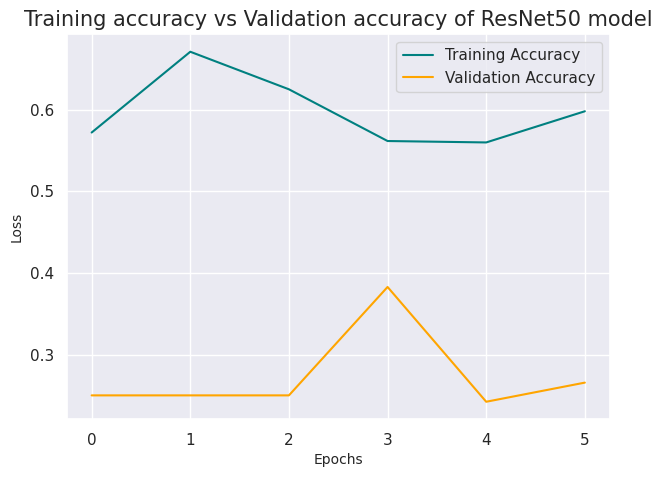

In [139]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

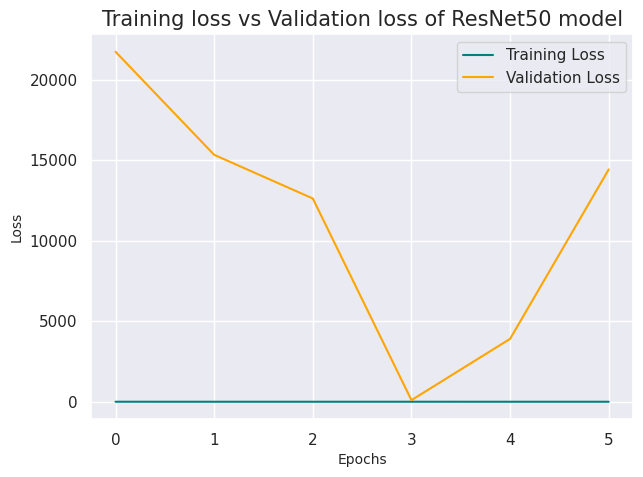

In [140]:
plt.figure(figsize = (7, 5))
plt.plot(history2.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history2.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [141]:
base_model2 = DenseNet121(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [142]:
model3 = Sequential()

In [143]:
model3.add(base_model2)
model3.add(Flatten())
model3.add(Dense(4, activation = 'softmax'))

In [144]:
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [145]:
early_stopping3 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [146]:
history3 = model3.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping3])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 108s 269ms/step - accuracy: 0.5234 - loss: 1.6990 - val_accuracy: 0.4219 - val_loss: 8.8177
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.7818 - loss: 0.8331 - val_accuracy: 0.2500 - val_loss: 1188.5632
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8280 - loss: 0.6905 - val_accuracy: 0.2500 - val_loss: 19350.4219


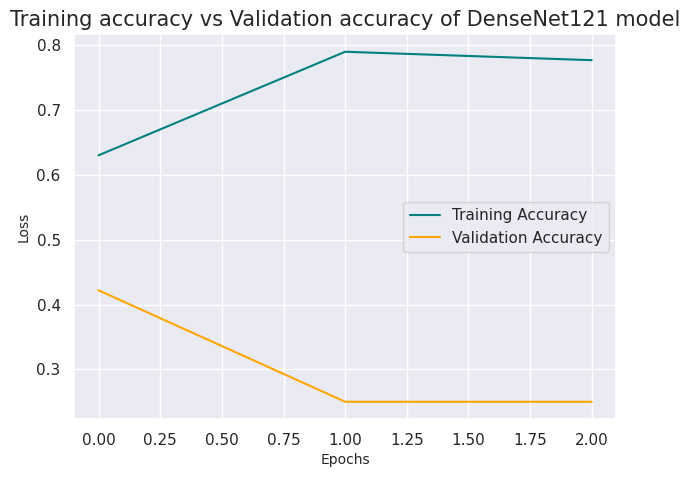

In [147]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

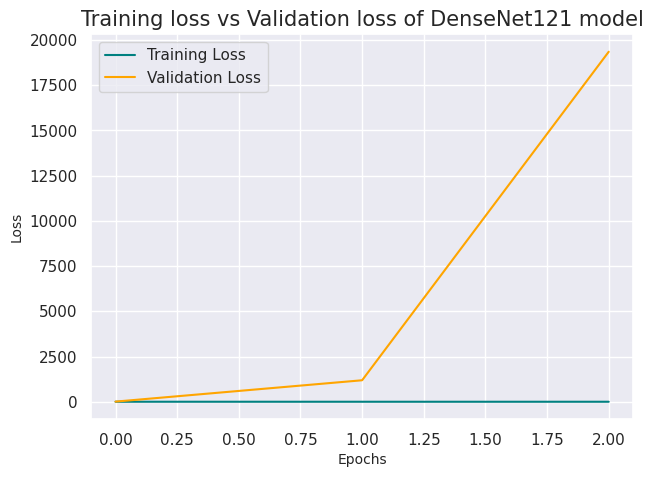

In [148]:
plt.figure(figsize = (7, 5))
plt.plot(history3.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history3.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [149]:
base_model3 = EfficientNetV2L(weights = 'imagenet', include_top = False, input_shape = (80, 80, 3))

In [150]:
model4 = Sequential()

In [151]:
model4.add(base_model3)
model4.add(Flatten())
model4.add(Dense(128, activation = 'relu'))
model4.add(Dense(4, activation = 'softmax'))

In [152]:
model4.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [153]:
early_stopping4 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [154]:
history4 = model4.fit(X_train, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping4])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 264s 708ms/step - accuracy: 0.4953 - loss: 1.6751 - val_accuracy: 0.5156 - val_loss: 1.8477
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 268ms/step - accuracy: 0.7949 - loss: 0.6087 - val_accuracy: 0.6562 - val_loss: 1.3002
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 275ms/step - accuracy: 0.8290 - loss: 0.4760 - val_accuracy: 0.8281 - val_loss: 0.5755
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 279ms/step - accuracy: 0.8944 - loss: 0.2789 - val_accuracy: 0.8438 - val_loss: 0.4745
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 283ms/step - accuracy: 0.9344 - loss: 0.2119 - val_accuracy: 0.8047 - val_loss: 0.6089
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 278ms/step - accuracy: 0.9349 - loss: 0.2114 - val_accuracy: 0.8672 - val_loss: 0.4464
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9418 - loss: 0.1562 - val_accuracy: 0.8672 - val_loss: 0.4494
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 276ms/step - accuracy: 0.9628 - loss: 0.1190 -

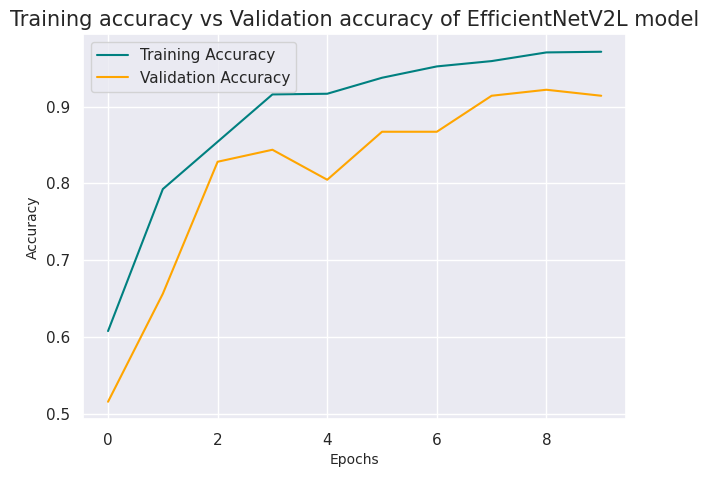

In [155]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history4.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of EfficientNetV2L model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

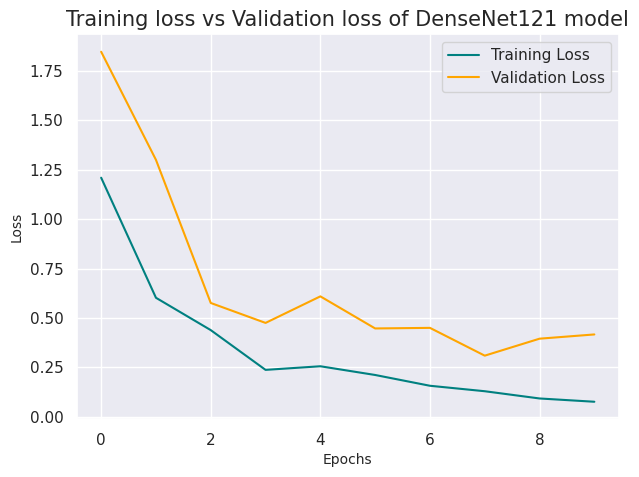

In [156]:
plt.figure(figsize = (7, 5))
plt.plot(history4.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history4.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of DenseNet121 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [157]:
model4.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.9211 - loss: 0.2529


[0.3161826729774475, 0.9156249761581421]

In [158]:
y_p = model4.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step


In [159]:
y_pred = [np.argmax(i) for i in y_p]

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93        80
           1       0.94      0.93      0.93        80
           2       0.87      0.90      0.88        80
           3       0.99      0.85      0.91        80

    accuracy                           0.92       320
   macro avg       0.92      0.92      0.92       320
weighted avg       0.92      0.92      0.92       320



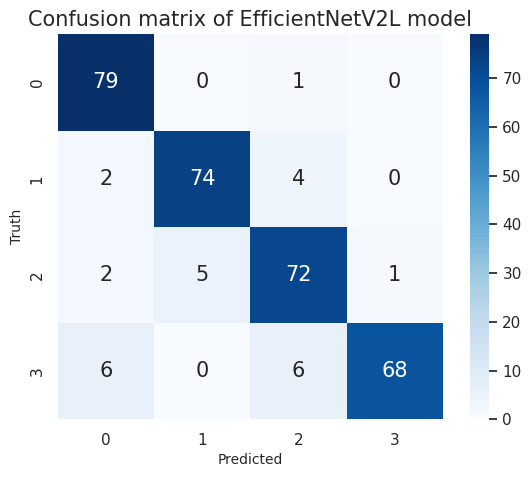

In [161]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd', cmap = 'Blues')
plt.title('Confusion matrix of EfficientNetV2L model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()

In [162]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y_le, test_size = 0.2, random_state = 101, shuffle = True, stratify = y_le)

In [163]:
X_train_n_np = np.array(X_train_n)

In [164]:
X_test_n_np = np.array(X_test_n)

In [165]:
X_train_n_scaled = X_train_n_np / 255

In [166]:
X_test_n_scaled = X_test_n_np / 255

In [167]:
early_stopping21 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [168]:
history21 = model.fit(X_train_n_scaled, y_train_n, validation_split = 0.1, epochs = 100, callbacks = [early_stopping21])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2603 - loss: 1.3637 - val_accuracy: 0.5000 - val_loss: 1.2606
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4540 - loss: 1.2013 - val_accuracy: 0.5547 - val_loss: 1.1505
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5547 - loss: 1.0615 - val_accuracy: 0.5625 - val_loss: 1.1376
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6054 - loss: 0.9558 - val_accuracy: 0.7109 - val_loss: 0.9508
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6590 - loss: 0.9224 - val_accuracy: 0.7109 - val_loss: 0.8565
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6657 - loss: 0.8424 - val_accuracy: 0.6953 - val_loss: 0.8235
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6803 - loss: 0.7935 - val_accuracy: 0.7031 - val_loss: 0.7942
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 0.7231 - val_accuracy: 0.7188 - 

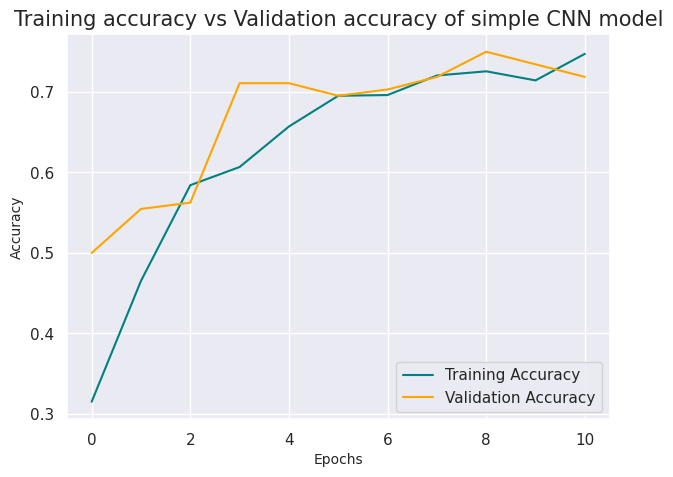

In [169]:
plt.figure(figsize = (7, 5))
plt.plot(history21.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history21.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of simple CNN model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

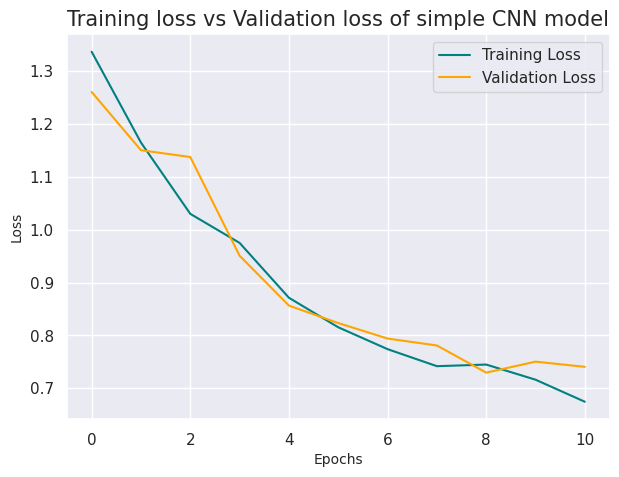

In [170]:
plt.figure(figsize = (7, 5))
plt.plot(history21.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history21.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of simple CNN model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()

In [171]:
early_stopping22 = EarlyStopping(monitor = 'val_loss', patience = 2)

In [172]:
history22 = model2.fit(X_train_n_scaled, y_train, validation_split = 0.1, epochs = 100, callbacks = [early_stopping22])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 33s 166ms/step - accuracy: 0.5877 - loss: 2.8075 - val_accuracy: 0.2109 - val_loss: 2.6974
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.7124 - loss: 1.5203 - val_accuracy: 0.2109 - val_loss: 3.6223
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7157 - loss: 1.0294 - val_accuracy: 0.2109 - val_loss: 2.4203
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.7444 - loss: 0.9720 - val_accuracy: 0.2969 - val_loss: 1.6270
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7245 - loss: 1.3132 - val_accuracy: 0.2500 - val_loss: 5.6711
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.7155 - loss: 1.6725 - val_accuracy: 0.2500 - val_loss: 1.7271


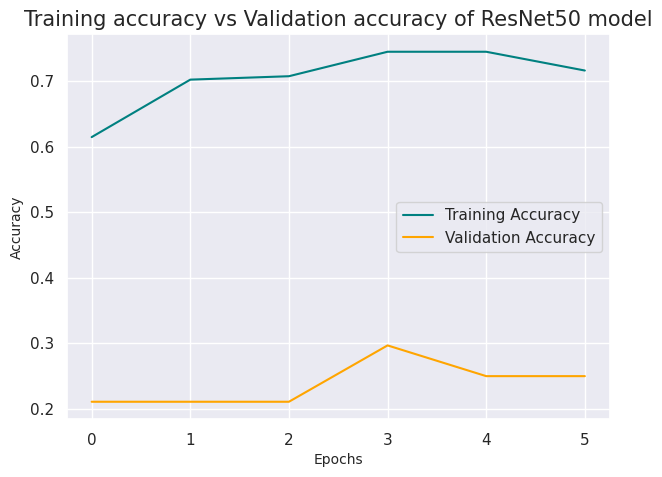

In [173]:
plt.figure(figsize = (7, 5))
plt.plot(history22.history['accuracy'], label = 'Training Accuracy', color = 'teal')
plt.plot(history22.history['val_accuracy'], label = 'Validation Accuracy', color = 'orange')
plt.title('Training accuracy vs Validation accuracy of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Accuracy', fontsize = 10)
plt.legend()
plt.show()

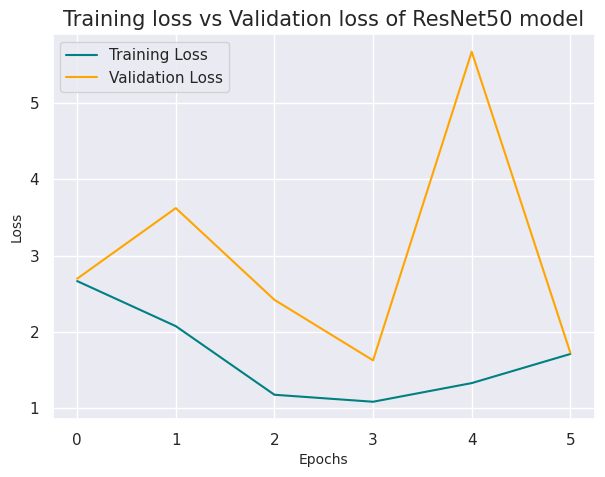

In [174]:
plt.figure(figsize = (7, 5))
plt.plot(history22.history['loss'], label = 'Training Loss', color = 'teal')
plt.plot(history22.history['val_loss'], label = 'Validation Loss', color = 'orange')
plt.title('Training loss vs Validation loss of ResNet50 model', fontsize = 15)
plt.xlabel('Epochs', fontsize = 10)
plt.ylabel('Loss', fontsize = 10)
plt.legend()
plt.show()